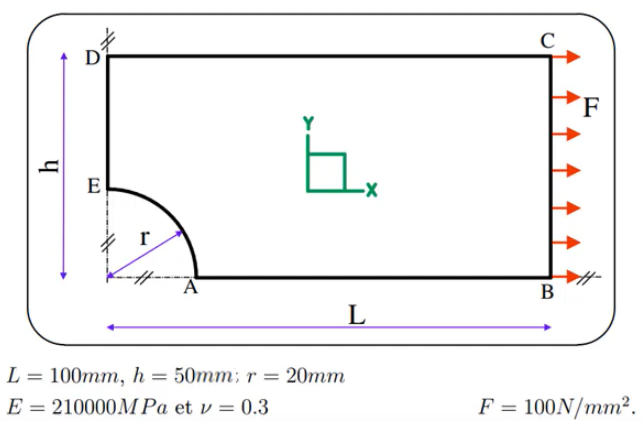

In [80]:
##import libraries
import numpy 
import matplotlib.pyplot as plt
import math

[[  0.          10.        ]
 [  0.          12.10526316]
 [  0.          14.21052632]
 ...
 [100.          44.73684211]
 [100.          47.36842105]
 [100.          50.        ]]


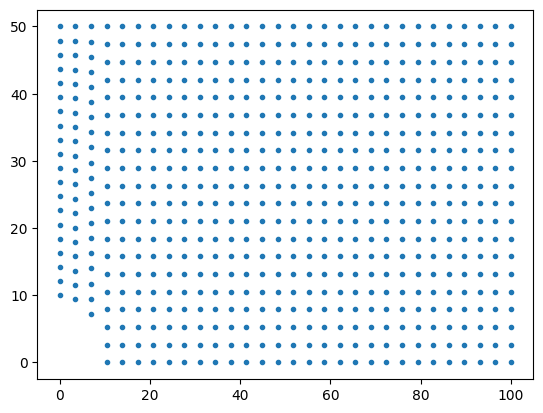

In [81]:
##Plate Dimensions
L=100
W=50
T=5
R=10
LD=30
WD=20

##initilize 
Nodes=[]

##Generate nodes with in domain
for x in numpy.linspace(0,L,LD):
    y0=math.sqrt(abs((R**2)-(x**2)))
    if (x<R):
        for y in numpy.linspace(y0,W,WD):
            Nodes.append([x,y])
    else:
        for y in numpy.linspace(0,W,WD):
            Nodes.append([x,y])

##Convert nodes into array
Node=numpy.array(Nodes)

print(Node)
#display nodes
plt.plot(Node[:,0],Node[:,1],'.')
plt.show()

In [82]:
## create elements using Delauny triangulation
from scipy.spatial import Delaunay
tri=Delaunay(Node)

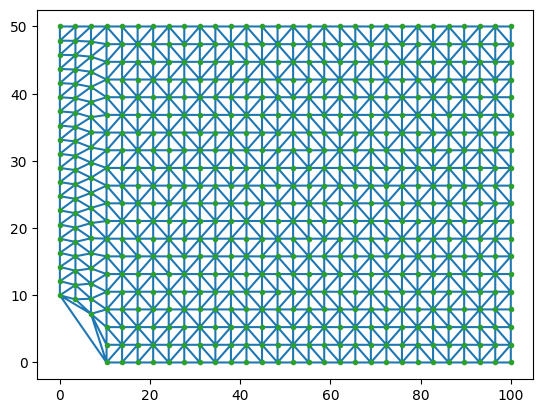

In [83]:
plt.triplot(Node[:,0],Node[:,1],tri.simplices)
plt.plot(Node[:,0],Node[:,1],".")
plt.show()

In [84]:
## create points on circle of diameter 9.75
p=[]
r2=9.5

for i in numpy.linspace(0,r2,50):
    p.append([i,math.sqrt(abs(r2**2-i**2))])

p1=[]
r3=8
for i in numpy.linspace(0,r3,20):
   p1.append([i,math.sqrt(abs(r3**2-i**2))])

p.extend(p1)
print(p)
a=tuple(tri.find_simplex(p))
tri.find_simplex(p)


[[np.float64(0.0), 9.5], [np.float64(0.19387755102040816), 9.498021451608242], [np.float64(0.3877551020408163), 9.492083331958339], [np.float64(0.5816326530612245), 9.482178202127029], [np.float64(0.7755102040816326), 9.468293612017176], [np.float64(0.9693877551020408), 9.450412021719382], [np.float64(1.163265306122449), 9.428510689794642], [np.float64(1.3571428571428572), 9.402561526802478], [np.float64(1.5510204081632653), 9.372530911843453], [np.float64(1.7448979591836733), 9.338379469267494], [np.float64(1.9387755102040816), 9.300061802000721], [np.float64(2.13265306122449), 9.257526177140944], [np.float64(2.326530612244898), 9.210714158537728], [np.float64(2.520408163265306), 9.159560179972923], [np.float64(2.7142857142857144), 9.103991051249144], [np.float64(2.9081632653061225), 9.043925387923323], [np.float64(3.1020408163265305), 8.979272953521583], [np.float64(3.2959183673469385), 8.909933900752861], [np.float64(3.4897959183673466), 8.835797895388204], [np.float64(3.68367346938

array([-1, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  3,  3,  3,  3,  3,  3,  3,  0, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1], dtype=int32)

In [85]:
##delete the unwanted elements
Mesh_Grid=numpy.delete(tri.simplices,a,0)

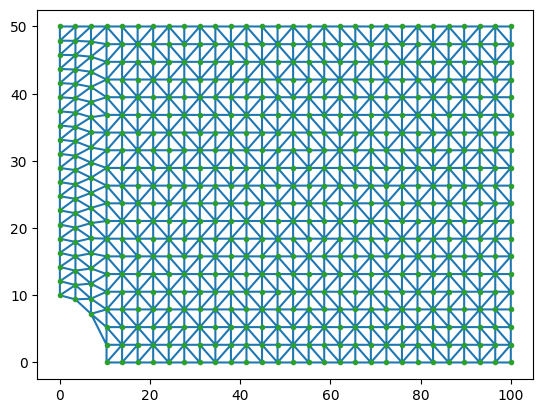

In [86]:
## Display Mesh after deleting the unwanted elements
plt.triplot(Node[:,0],Node[:,1],Mesh_Grid)
plt.plot(Node[:,0],Node[:,1],".")
plt.show()

In [87]:
## Node and element count
print(len(Node))
print(len(Mesh_Grid))

600
1100


In [88]:
### export it into .dat file

file=open("E:\\plate_mesh_cs.csv",'w')
file.write('{},{},{},{}\n'.format("ID","x","y","z"))
#write nodes
for i,eachnode in enumerate(Node):
    file.write("{},{},{},{}\n".format(i,eachnode[0],eachnode[1],0))
#write elements
for j,element in enumerate(Mesh_Grid):
    file.write("{},{},{},{}\n".format(j,element[0],element[1],element[2]))
    
file.close()

In [89]:
## add z coordinate in Node
for i in Nodes:
    i.append(0)
    print(i)
print(type(Nodes))

[np.float64(0.0), np.float64(10.0), 0]
[np.float64(0.0), np.float64(12.105263157894736), 0]
[np.float64(0.0), np.float64(14.210526315789473), 0]
[np.float64(0.0), np.float64(16.315789473684212), 0]
[np.float64(0.0), np.float64(18.421052631578945), 0]
[np.float64(0.0), np.float64(20.526315789473685), 0]
[np.float64(0.0), np.float64(22.63157894736842), 0]
[np.float64(0.0), np.float64(24.736842105263158), 0]
[np.float64(0.0), np.float64(26.842105263157894), 0]
[np.float64(0.0), np.float64(28.94736842105263), 0]
[np.float64(0.0), np.float64(31.052631578947366), 0]
[np.float64(0.0), np.float64(33.1578947368421), 0]
[np.float64(0.0), np.float64(35.26315789473684), 0]
[np.float64(0.0), np.float64(37.368421052631575), 0]
[np.float64(0.0), np.float64(39.473684210526315), 0]
[np.float64(0.0), np.float64(41.578947368421055), 0]
[np.float64(0.0), np.float64(43.68421052631579), 0]
[np.float64(0.0), np.float64(45.78947368421053), 0]
[np.float64(0.0), np.float64(47.89473684210526), 0]
[np.float64(0.0

In [ ]:

#stlFile=open("E:\\plate_quater_mesh.stl",'w')
#for j,element in enumerate(mesh):
    #print(f'{element[0]}>>{Node[element[0]]}')
    #print(f'{element[1]}>>{Node[element[1]]}')
    #print(f'{element[2]}>>{Node[element[2]]}')
    #stlFile.write()

In [ ]:
### export it into .stl file
#stlFile=open("E:\\plate_quater_mesh.stl",'w')
#csvfile=open(r"E:\plate_mesh_cs.csv")
#for eachline in csvfile:
vertices=np.array(Nodes)
from stl import mesh
import numpy as np
plate=mesh.Mesh(np.zeros(Mesh_Grid.shape[0],dtype=mesh.Mesh.dtype))
for i,m in enumerate(Mesh_Grid):
    for j in range(3):
        plate.vectors[i][j]=vertices[m[j],:]
plate.save("E:\\plate_quater_mesh_123.stl")